In [41]:
import pandas as pd
import numpy as np
from sklearn import preprocessing, neighbors
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt


In [42]:
df = pd.read_csv('/Users/Namrata/Downloads/voice.csv')
df.head(5)

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


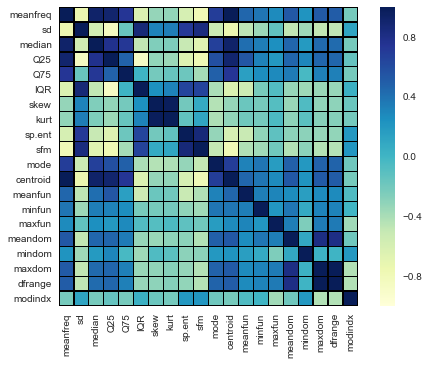

In [43]:
corrmat=df.corr()
sns.heatmap(corrmat,linewidths=0.25,vmax=1.0, square=True, cmap="YlGnBu", linecolor='black')
plt.show()

In [44]:
# Name of the columns
col_names = list(df.columns.values)
print(col_names)
print (type(df.columns.values))

['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt', 'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun', 'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label']
<type 'numpy.ndarray'>


In [45]:
df = df.rename(columns={'label': 'gender'})
df.columns.values

array(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'gender'], dtype=object)

In [46]:
#Lets use logistic Regression:

#Producing X and y
X = np.array(df.drop(['gender'], 1))
y = np.array(df['gender'])

#Dividing the data randomly into training and test set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

model=LogisticRegression()
model.fit(X_train,y_train)

print('Accuracy1 :',model.score(X_train,y_train))
print('Accuracy2 :',model.score(X_test,y_test))

('Accuracy1 :', 0.90765588003157061)
('Accuracy2 :', 0.91324921135646686)


In [47]:
#KNN Classifier
#Producing X and y
X = np.array(df.drop(['gender'], 1))
y = np.array(df['gender'])

#Dividing the data randomly into training and test set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

model = neighbors.KNeighborsClassifier()
model.fit(X_train, y_train)

accuracy = model.score(X_test, y_test)
print('Accuracy='+str(accuracy))


#The above was without any tuning ,now we will drop some columns which does not make any sense
#We will drop col=median,mode,Q25,Q75,IQR.
#next edit use only few=meanfreq,sd,median,gender(for no error)

Accuracy=0.747634069401


In [48]:
df1=df[['meanfreq','sd','median','meanfun','gender']]
X = np.array(df1.drop(['gender'], 1))
y = np.array(df1['gender'])

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

model = neighbors.KNeighborsClassifier()
model.fit(X_train, y_train)

accuracy2 = model.score(X_test, y_test)
print('Accuracy2='+str(accuracy2))

#All the models should be above the base_line model:Base line model acc=50:50
#But this is not very helpful,have to find new ways for k-nearest neibhors

Accuracy2=0.965299684543


In [49]:
df2=df[['meanfreq','sd','meanfun','gender']]
X = np.array(df2.drop(['gender'], 1))
y = np.array(df2['gender'])

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

model = neighbors.KNeighborsClassifier()
model.fit(X_train, y_train)

accuracy2 = model.score(X_test, y_test)
print('Accuracy='+str(accuracy2))

Accuracy=0.973186119874


In [50]:
#print(X_train.shape,y_train.shape,)
print(X_test.shape,y_test.shape)

((634, 3), (634,))


In [51]:
df3=df[['meanfun','IQR','Q25','sp.ent','sd','sfm','meanfreq','gender']]
X = np.array(df3.drop(['gender'], 1))
y = np.array(df3['gender'])

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

model = neighbors.KNeighborsClassifier()
model.fit(X_train, y_train)

accuracy3 = model.score(X_test, y_test)
print('Accuracy3='+str(accuracy3))

Accuracy3=0.976340694006


In [52]:
df.replace({'male':0,'female':1},inplace=True)
X = np.array(df.drop(['gender'], 1))
y = np.array(df['gender'])

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [53]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import AdaBoostClassifier
#DecisionTreeClassifier
dt=DecisionTreeClassifier(max_depth=3,min_samples_leaf=int(0.5*len(X_train)))
boosted_dt=AdaBoostClassifier(dt,algorithm='SAMME',n_estimators=800,learning_rate=0.5)
boosted_dt.fit(X_train,y_train)
y_predicted=boosted_dt.predict(X_test)

print ("Area under ROC curve: %.4f"%(roc_auc_score(y_test, y_predicted)))

Area under ROC curve: 0.9668


In [54]:
#support vector machine
from sklearn import svm
svc = svm.SVC(kernel='linear', C=1,gamma='auto').fit(X_train, y_train)
y_pred=svc.predict(X_test)
accuracy=roc_auc_score(y_test,y_pred)
print('Accuracy :',accuracy)

('Accuracy :', 0.9262242043542751)


In [55]:
# import necessary packages
import matplotlib.pylab as plt
from scipy import interp
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve,auc
from sklearn.model_selection import StratifiedKFold
import matplotlib.patches as patches
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [56]:
# import data, see feature names, label count and data info
df = pd .read_csv('/Users/ladee/Downloads/voice.csv')
print(df.columns)
label_value_count = df.label.value_counts()
print(label_value_count)
print(df.info())

Index([u'meanfreq', u'sd', u'median', u'Q25', u'Q75', u'IQR', u'skew', u'kurt',
       u'sp.ent', u'sfm', u'mode', u'centroid', u'meanfun', u'minfun',
       u'maxfun', u'meandom', u'mindom', u'maxdom', u'dfrange', u'modindx',
       u'label'],
      dtype='object')
male      1584
female    1584
Name: label, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
meanfreq    3168 non-null float64
sd          3168 non-null float64
median      3168 non-null float64
Q25         3168 non-null float64
Q75         3168 non-null float64
IQR         3168 non-null float64
skew        3168 non-null float64
kurt        3168 non-null float64
sp.ent      3168 non-null float64
sfm         3168 non-null float64
mode        3168 non-null float64
centroid    3168 non-null float64
meanfun     3168 non-null float64
minfun      3168 non-null float64
maxfun      3168 non-null float64
meandom     3168 non-null float64
mindom      3168 non-null 

In [57]:
# Convert string label to float : male = 1, female = 0
dict = {'label':{'male':0,'female':1}}      # label = column name
df.replace(dict,inplace = True)           # replace = str to numerical
x = df.loc[:, df.columns != 'label']
y = df.loc[:,'label']

In [58]:
random_state = np.random.RandomState(0)
clf = RandomForestClassifier(random_state=random_state)
cv = StratifiedKFold(n_splits=5,shuffle=False)


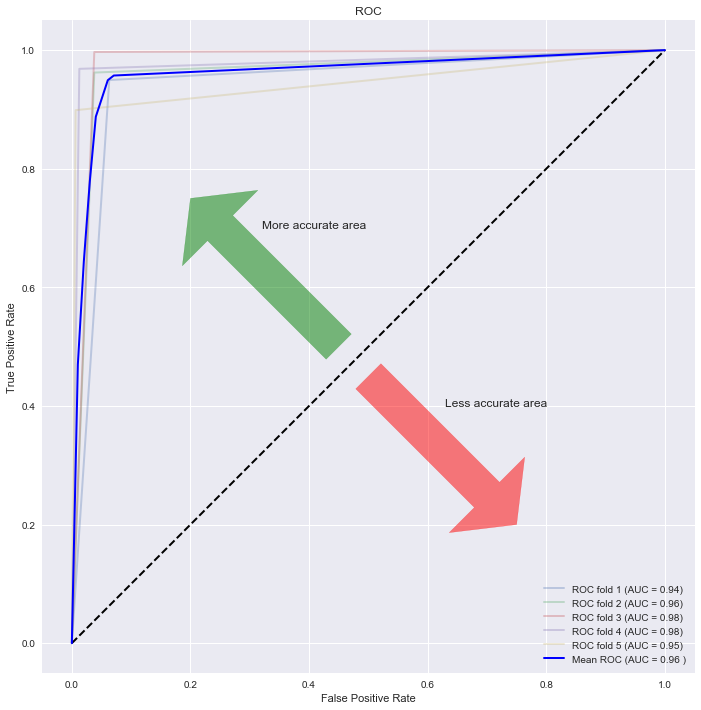

In [59]:
# plot arrows
fig1 = plt.figure(figsize=[12,12])
ax1 = fig1.add_subplot(111,aspect = 'equal')
ax1.add_patch(
    patches.Arrow(0.45,0.5,-0.25,0.25,width=0.3,color='green',alpha = 0.5)
    )
ax1.add_patch(
    patches.Arrow(0.5,0.45,0.25,-0.25,width=0.3,color='red',alpha = 0.5)
    )

tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1
for train,test in cv.split(x,y):
    prediction = clf.fit(x.iloc[train],y.iloc[train]).predict(x.iloc[test])
    fpr, tpr, t = roc_curve(y[test], prediction)
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.text(0.32,0.7,'More accurate area',fontsize = 12)
plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.show()

In [60]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score  
from sklearn.decomposition import PCA
from subprocess import check_output
from sklearn import svm

df_x=df.iloc[:,1:19]
df_y=df.iloc[:,20]
x_train,x_test,y_train,y_test=train_test_split(df_x,df_y,test_size=.2)
print("Dimension reduction by PCA::")
pca=PCA(n_components=9,whiten=True)
x=pca.fit(df_x).transform(df_x)
x_train,x_test,y_train,y_test=train_test_split(df_x,df_y,test_size=.2)
print("Decision Tree Classification::")
model=DecisionTreeClassifier()
fittedModel=model.fit(x_train, y_train)
predictions=fittedModel.predict(x_test)
predictions
print("Confusion Matrix :",
      confusion_matrix(y_test,predictions))
print("Accuracy::",accuracy_score(y_test,predictions) )

Dimension reduction by PCA::
Decision Tree Classification::
('Confusion Matrix :', array([[301,  10],
       [ 16, 307]]))
('Accuracy::', 0.95899053627760256)


In [61]:
pd.isnull(df).sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

In [62]:
df ['label'].value_counts()

1    1584
0    1584
Name: label, dtype: int64

In [63]:
df.columns

Index([u'meanfreq', u'sd', u'median', u'Q25', u'Q75', u'IQR', u'skew', u'kurt',
       u'sp.ent', u'sfm', u'mode', u'centroid', u'meanfun', u'minfun',
       u'maxfun', u'meandom', u'mindom', u'maxdom', u'dfrange', u'modindx',
       u'label'],
      dtype='object')

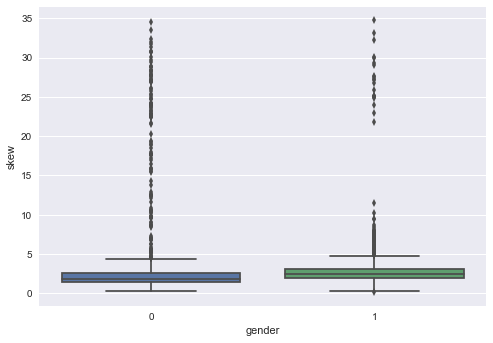

In [64]:
df = df.rename(columns={'label':'gender'})
sns.boxplot(x='gender', y= 'skew',data=df)
plt.show()

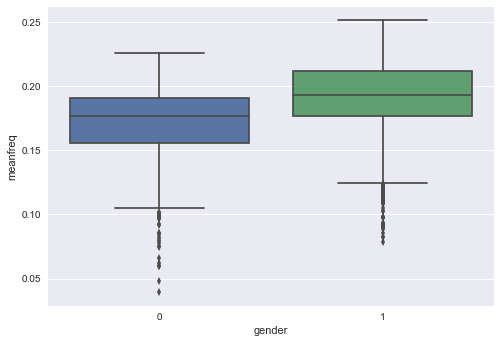

In [65]:
sns.boxplot(x='gender', y= 'meanfreq',data=df)
plt.show()

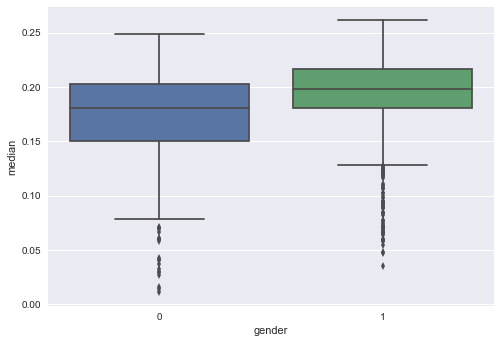

In [66]:
sns.boxplot(x='gender', y= 'median',data=df)
plt.show()